# **Appliances Energy Prediction**  
## **Exploratory Data Analysis (EDA)**

This notebook investigates the *Appliances Energy Prediction* dataset with the goal of understanding the structure of the data, the distribution of the target variable, and the relationships between predictors and energy consumption.  
This analysis provides the foundation for subsequent preprocessing, modeling, and evaluation steps.

### **🧪 Code Cell 1 — Imports & Setup**

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_context("notebook")

# Reproducibility
RANDOM_STATE = 42

### **🧪 Code Cell 2 — Load Dataset**

In [34]:
# Load the dataset
df = pd.read_csv("energydata_complete.csv")

# Display first rows
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## **Dataset Overview**

In this section, we examine the general structure of the dataset, including:
- Number of observations and features
- Data types
- Presence of missing values
- Summary statistics

### **🧪 Code Cell 3 — Shape, Types, Missing Values**

In [35]:
# Dataset shape
print("Dataset shape:", df.shape)

# Data types
df.info()

# Missing values per column
df.isna().sum()

Dataset shape: (19735, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### **🧪 Code Cell 4 — Summary Statistics**

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


## **Target Variable Analysis**

The target variable is **Appliances**, which represents the energy consumption (in Wh) of household appliances over 10-minute intervals.

We analyze its distribution to identify:
- Skewness
- Presence of outliers
- Suitability for linear vs nonlinear models

### **🧪 Code Cell 5 — Target Distribution (Histogram)**

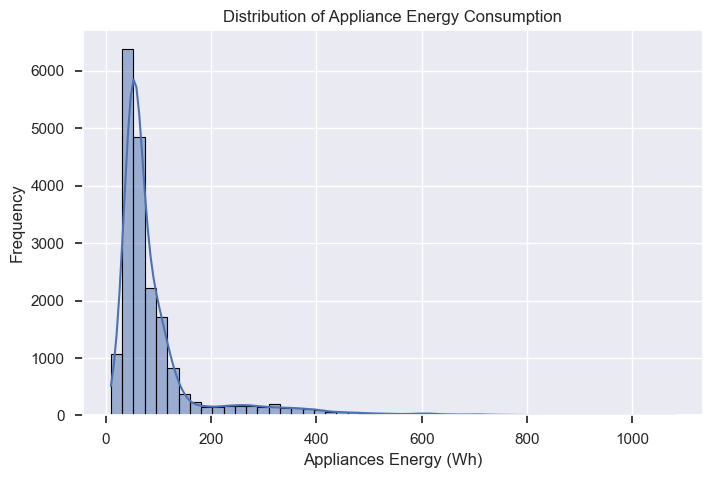

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Appliances"], bins=50, kde=True)
plt.title("Distribution of Appliance Energy Consumption")
plt.xlabel("Appliances Energy (Wh)")
plt.ylabel("Frequency")
plt.show()

### **🧪 Code Cell 6 — Target Boxplot**

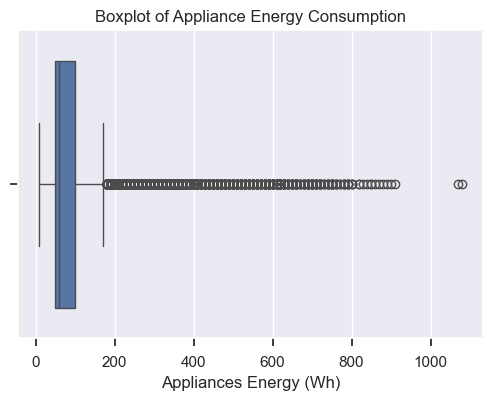

In [38]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Appliances"])
plt.title("Boxplot of Appliance Energy Consumption")
plt.xlabel("Appliances Energy (Wh)")
plt.show()

The target variable shows a right-skewed distribution, with a high concentration of low energy consumption values and a smaller number of high-consumption peaks.  
This suggests potential heteroscedasticity and motivates the use of nonlinear models and, optionally, a logarithmic transformation in later stages.

## **Relationships Between Predictors and Energy Consumption**

To explore dependencies between predictors and the target variable, we analyze:
- Correlations among numerical features
- Scatter plots for key temperature and humidity variables

These analyses help identify nonlinear patterns and candidate variables for ensemble and kernel-based models.

### **🧪 Code Cell 7 — Correlation Heatmap**

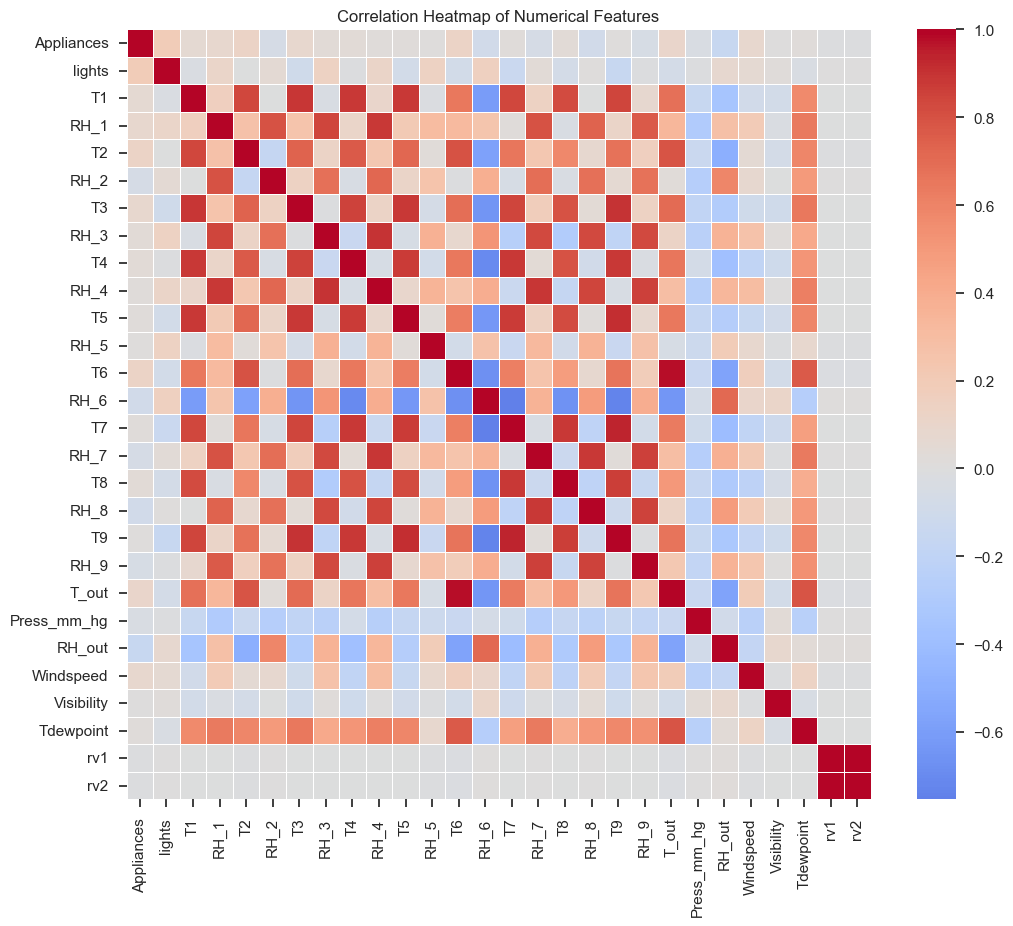

In [39]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **🧪 Code Cell 8 — Temperature vs Appliances**

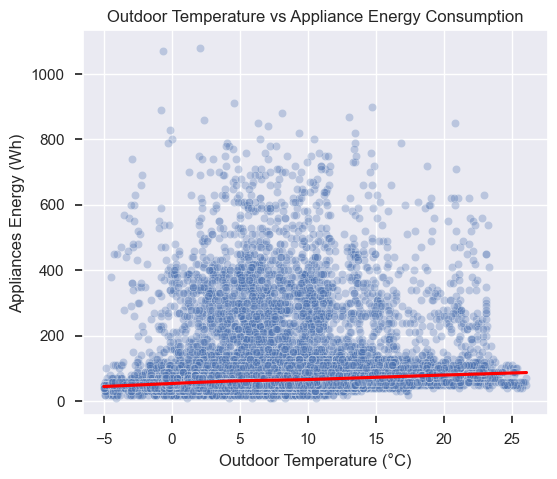

In [40]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    x=df["T_out"],
    y=df["Appliances"],
    alpha=0.3
)

sns.regplot(
    x=df["T_out"],
    y=df["Appliances"],
    scatter=False,
    lowess=True,
    color="red"
)

plt.title("Outdoor Temperature vs Appliance Energy Consumption")
plt.xlabel("Outdoor Temperature (°C)")
plt.ylabel("Appliances Energy (Wh)")
plt.show()

### **🧪 Code Cell 9 — Humidity vs Appliances**

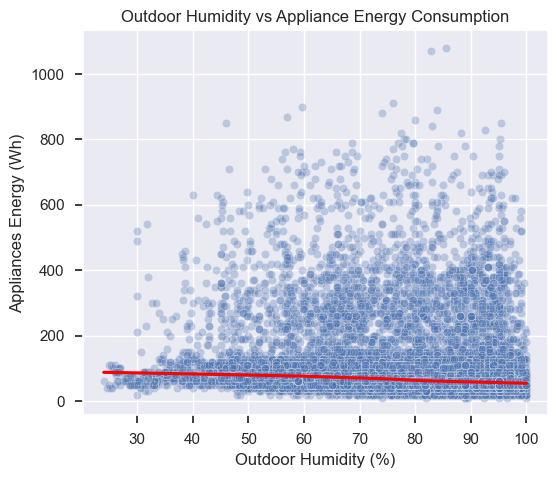

In [41]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    x=df["RH_out"],
    y=df["Appliances"],
    alpha=0.3
)

sns.regplot(
    x=df["RH_out"],
    y=df["Appliances"],
    scatter=False,
    lowess=True,
    color="red"
)

plt.title("Outdoor Humidity vs Appliance Energy Consumption")
plt.xlabel("Outdoor Humidity (%)")
plt.ylabel("Appliances Energy (Wh)")
plt.show()

The scatter plots suggest weak linear correlations between individual environmental variables and energy consumption.  
However, visible dispersion patterns and thresholds indicate potential nonlinear relationships, such as comfort-driven appliance usage and occupancy-related effects.

These observations motivate the use of nonlinear regressors and ensemble methods capable of capturing complex feature interactions.

# **Data Preprocessing**

This section prepares the dataset for model development by addressing:
- Missing values
- Outlier detection and treatment
- Feature scaling
- Optional target transformation
- Feature engineering

All preprocessing choices are explicitly justified with respect to model assumptions and robustness.

## **Handling Missing Values**

We begin by identifying missing values in the dataset.  
Appropriate handling of missing data is essential to ensure model stability and reproducibility.

### **🧪 Code Cell 10 — Missing Value Check**

In [42]:
# Missing values per column
missing_values = df.isna().sum()

missing_values[missing_values > 0]

Series([], dtype: int64)

**No missing values** are present in the dataset.  
Therefore, no imputation or row removal is required, and the dataset can be used directly for modeling.

## **Outlier Detection and Treatment**

Outliers in energy consumption may correspond to legitimate high-usage events.  
We detect outliers using the Interquartile Range (IQR) method and visualize them using boxplots.

### **🧪 Code Cell 11 — IQR Outlier Detection (Target Variable)**

In [43]:
# IQR method for outlier detection on target variable
Q1 = df["Appliances"].quantile(0.25)
Q3 = df["Appliances"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df["Appliances"] < lower_bound) | 
    (df["Appliances"] > upper_bound)
]

print(f"Number of detected outliers: {outliers.shape[0]}")

Number of detected outliers: 2138


### **🧪 Code Cell 12 — Boxplot Visualization**

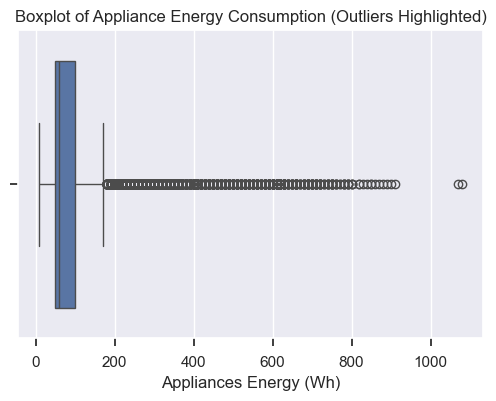

In [44]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Appliances"])
plt.title("Boxplot of Appliance Energy Consumption (Outliers Highlighted)")
plt.xlabel("Appliances Energy (Wh)")
plt.show()

Although outliers are detected using the IQR method, they are retained in the dataset.

Justification:
- High energy consumption values may correspond to real appliance usage patterns.
- Tree-based ensemble models are robust to outliers.
- Removing outliers could bias the model toward low-consumption behavior.

Therefore, no outlier removal or capping is applied.

## **Feature Scaling**

Feature scaling is applied selectively based on model sensitivity.

- Scale-sensitive models (e.g., Linear Regression, SVR) require standardized inputs.
- Tree-based ensemble models do not require scaling due to their split-based structure.

Standardization (z-score normalization) is used where applicable.

### **🧪 Code Cell 13 — Feature/Target Separation & Time-Based Feature Engineering**

In [45]:
# Convert 'date' to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract time-based features
df["hour"] = df["date"].dt.hour #int32
df["day_of_week"] = df["date"].dt.dayofweek #int32

# Define features and target
X = df.drop(columns=["Appliances", "date"])  # drop target and original datetime
y = df["Appliances"]

# Quick check
X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day_of_week
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,0
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,0
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,0
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,0
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,0


### **🧪 Code Cell 14 — Train–Test Split**

In [46]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((15788, 29), (3947, 29))

### **🧪 Code Cell 15 — Standardization for Scale-Sensitive Models**

In [47]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only for scaling
X_train_numeric = X_train.select_dtypes(include=["float64", "int64", "int32"])
X_test_numeric = X_test.select_dtypes(include=["float64", "int64", "int32"])

# Initialize scaler
scaler = StandardScaler()

# Fit on train, transform train and test
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_numeric),
    columns=X_train_numeric.columns,
    index=X_train_numeric.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    columns=X_test_numeric.columns,
    index=X_test_numeric.index
)

X_train_scaled.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day_of_week
2133,-0.47829,-1.117535,1.322565,-0.521432,1.145891,-0.936016,1.553528,-0.855218,1.767774,-1.127855,...,0.540910,0.863704,0.381152,1.424184,-1.255203,0.992041,0.979912,0.979912,0.072446,-1.000445
19730,-0.47829,2.409418,1.590438,2.524617,0.392577,2.456153,0.590126,1.875073,1.511362,1.945969,...,2.874781,-0.045041,-1.621760,-0.286316,-1.241097,2.273160,1.245757,1.245757,0.793894,0.509259
3288,-0.47829,0.504076,1.052165,0.540967,0.531300,-0.152313,1.635181,0.558683,0.327863,-0.269346,...,-0.153619,0.633127,-1.062287,1.629444,0.141283,-0.852294,1.173907,1.173907,0.216736,-0.497210
7730,-0.47829,-1.179665,-0.557603,-1.432060,0.124030,-0.831411,-0.642372,-1.201379,-0.472943,-0.707005,...,-0.998318,-1.898699,0.974193,-1.244196,0.874791,-0.606383,-0.855721,-0.855721,-0.360422,1.012494
8852,-0.47829,-0.676407,-1.257611,-1.477591,-0.157043,-0.985827,-0.692699,-0.660197,-1.050447,-0.755634,...,-1.555193,1.727238,0.839920,-0.970516,-0.366530,-1.359982,-0.974162,-0.974162,-1.081870,1.515729


## **Optional Logarithmic Transformation of the Target**

The target variable exhibits right skewness.  
An optional logarithmic transformation is evaluated to stabilize variance:

\[
y' = \log(1 + y)
\]

This transformation is applied only for selected models and is clearly distinguished from the main pipeline.

### **🧪 Code Cell 16 — Log-Transformed Target**

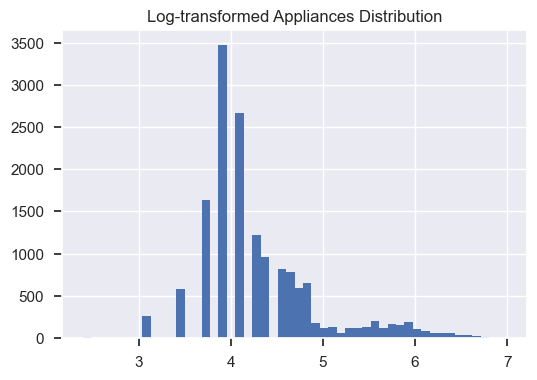

In [48]:
# Optional log-transformed target to stabilize variance
y_train_log = np.log1p(y_train)

y_test_log = np.log1p(y_test)

# Example: check distribution
plt.figure(figsize=(6,4))
plt.hist(y_train_log, bins=50)
plt.title("Log-transformed Appliances Distribution")
plt.show()

# **Train-Test Split & Cross-Validation**

- We already performed an 80/20 train-test split to create independent training and test sets.
- To ensure consistent and reliable model evaluation, we use **k-fold cross-validation** (k=5) on the training set.
- Cross-validation provides a better estimate of model generalization by averaging performance over multiple folds.
- For scale-sensitive models, the training folds are scaled independently in each iteration to avoid data leakage.
- For tree-based models, scaling is not necessary.

### **🧪 Code Cell 17 — Cross-Validation Setup (Example)**

In [49]:
from sklearn.model_selection import KFold

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Example: checking the split indices
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {fold+1}: Train size = {len(train_idx)}, Validation size = {len(val_idx)}")

Fold 1: Train size = 12630, Validation size = 3158
Fold 2: Train size = 12630, Validation size = 3158
Fold 3: Train size = 12630, Validation size = 3158
Fold 4: Train size = 12631, Validation size = 3157
Fold 5: Train size = 12631, Validation size = 3157


> **Note:** During cross-validation, scaling is applied **within each training fold** for scale-sensitive models (Linear Regression, SVR, Polynomial Regression) to prevent information from leaking from the validation fold.  
> Tree-based models (Random Forest, Gradient Boosting) use unscaled numeric features.

### **🧪 Code Cell 18 — Function for Cross-Validation Scores (Optional Helper)**

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

# Helper function for MAE scoring
mae_scorer = make_scorer(mean_absolute_error)

def cross_val_model(model, X, y, cv=kf, scoring=mae_scorer):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print(f"Cross-Validation MAE scores: {scores}")
    print(f"Mean MAE: {scores.mean():.4f} ± {scores.std():.4f}")
    return scores

### **Why 80/20 Split and K-Fold Cross-Validation?**

- We used an **80/20 train-test split** to reserve a portion of the data for final evaluation, ensuring our test set is unseen by the model.
- **5-fold cross-validation** on the training set provides a more **stable estimate of generalization performance**, avoiding reliance on a single random split.
- This prevents the model from "getting lucky" on one split and helps detect overfitting or underfitting reliably.

# **Model Development**

We implement and compare several regression models:

1. **Baseline Linear Regression** – serves as a reference to understand if non-linear models improve performance.  
2. **Nonlinear Models**:
   - Polynomial Regression (with degree tuning)
   - Support Vector Regression (SVR) with RBF kernel
   - Decision Tree Regression
3. **Ensemble Models**:
   - Random Forest Regressor
   - Gradient Boosting Regressor (can also use XGBoost or LightGBM)

> Hyperparameters are tuned using a small grid search with 3–5 configurations to avoid overfitting and to find reasonable model settings.

### **🧪 Code Cell 19 — Baseline Linear Regression**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
lin_reg = LinearRegression()

# Train on scaled numeric features (for linear regression)
lin_reg.fit(X_train_scaled, y_train_log)

# Predictions
y_pred_lin_log = lin_reg.predict(X_test_scaled)
y_pred_lin = np.expm1(y_pred_lin_log)  # Convert back from log scale

# Evaluation
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression - MAE: {mae_lin:.4f}, RMSE: {rmse_lin:.4f}, R²: {r2_lin:.4f}")

Linear Regression - MAE: 44.3465, RMSE: 94.2407, R²: 0.1125


### **🧪 Code Cell 20 — Polynomial Regression (Nonlinear)**

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.pipeline import Pipeline

# Pipeline: Polynomial features + Ridge Regression
# We use Ridge instead of LinearRegression to handle the multicollinearity
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge()) 
])

# Grid of polynomial degrees to test
param_grid_poly = {
    'poly__degree': [1, 2, 3]
}

# Grid search with 5-fold CV
grid_poly = GridSearchCV(
    poly_pipeline, 
    param_grid_poly, 
    cv=kf, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1, # n_jobs=-1 ensures all CPU cores are working.
    verbose=1 # This will show you progress so you know it's working
)

print("Starting Grid Search for Polynomial Regression...")
grid_poly.fit(X_train_scaled, y_train_log)

# Best parameters
print("Best Polynomial degree:", grid_poly.best_params_)

# Predict with best model
y_pred_poly_log = grid_poly.best_estimator_.predict(X_test_scaled)
y_pred_poly = np.expm1(y_pred_poly_log)  # Convert back from log scale

# Evaluate
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Best) - MAE: {mae_poly:.4f}, RMSE: {rmse_poly:.4f}, R²: {r2_poly:.4f}")

Starting Grid Search for Polynomial Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Polynomial degree: {'poly__degree': 3}
Polynomial Regression (Best) - MAE: 33.8950, RMSE: 79.5697, R²: 0.3673


### **🧪 Code Cell 21 — Support Vector Regression (SVR)**

In [53]:
from sklearn.svm import SVR

# Initialize SVR with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')

# Train
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR (RBF) - MAE: {mae_svr:.4f}, RMSE: {rmse_svr:.4f}, R²: {r2_svr:.4f}")

SVR (RBF) - MAE: 35.9158, RMSE: 86.7131, R²: 0.2486


### **🧪 Code Cell 22 — Decision Tree Regressor**

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)

# Train on numeric (unscaled) features
dt_model.fit(X_train_numeric, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_numeric)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt:.4f}, RMSE: {rmse_dt:.4f}, R²: {r2_dt:.4f}")

Decision Tree - MAE: 44.4942, RMSE: 89.0307, R²: 0.2079


### **🧪 Code Cell 23 — Random Forest Regressor (Ensemble)**

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5]
}

# Randomized search
rf_grid = RandomizedSearchCV(
    RandomForestRegressor(random_state=RANDOM_STATE),
    param_distributions=rf_param_grid,
    n_iter=4,           # test 4 random combinations
    cv=3,               # reduce folds to 3 for speed
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1           # use all cores to speed up
)

rf_grid.fit(X_train_numeric, y_train)

# Best parameters
print("Best RF parameters:", rf_grid.best_params_)

# Predict with best model
y_pred_rf = rf_grid.best_estimator_.predict(X_test_numeric)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

Best RF parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Random Forest - MAE: 32.2328, RMSE: 67.8109, R²: 0.5405


### **🧪 Code Cell 24 — Gradient Boosting Regressor**

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1]
}

gb_grid = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=RANDOM_STATE),
    param_distributions=gb_param_grid,
    n_iter=3,              # test 3 random combinations
    cv=3,                  # reduce folds for speed
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1              # use all CPU cores
)

gb_grid.fit(X_train_numeric, y_train)

# Best parameters
print("Best GB parameters:", gb_grid.best_params_)

# Predict with best model
y_pred_gb = gb_grid.best_estimator_.predict(X_test_numeric)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MAE: {mae_gb:.4f}, RMSE: {rmse_gb:.4f}, R²: {r2_gb:.4f}")

Best GB parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting - MAE: 40.5911, RMSE: 77.6133, R²: 0.3980


# **Model Evaluation & Comparison**

We evaluate all models on the **test set** using:

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² (Coefficient of Determination)

Additionally:

- Residual plots (predicted vs. actual)
- Feature importance for tree-based models
- Analysis of overfitting and underfitting

### **🧪 Code Cell 25 — Metrics Table for All Models**

In [57]:
# Train predictions
y_train_pred_lin = lin_reg.predict(X_train_scaled)
y_train_pred_poly = grid_poly.best_estimator_.predict(X_train_scaled)
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_train_pred_dt = dt_model.predict(X_train_numeric)
y_train_pred_rf = rf_grid.best_estimator_.predict(X_train_numeric)
y_train_pred_gb = gb_grid.best_estimator_.predict(X_train_numeric)

# Collect metrics for train and test
metrics = {
    "Model": ["Linear Regression", "Polynomial Regression", "SVR (RBF)", 
              "Decision Tree", "Random Forest", "Gradient Boosting"],
    "MAE_Train": [
        mean_absolute_error(y_train, y_train_pred_lin),
        mean_absolute_error(y_train, y_train_pred_poly),
        mean_absolute_error(y_train, y_train_pred_svr),
        mean_absolute_error(y_train, y_train_pred_dt),
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_train, y_train_pred_gb)
    ],
    "MAE_Test": [mae_lin, mae_poly, mae_svr, mae_dt, mae_rf, mae_gb],
    "RMSE_Train": [
        np.sqrt(mean_squared_error(y_train, y_train_pred_lin)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_poly)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_svr)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_rf)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
    ],
    "RMSE_Test": [rmse_lin, rmse_poly, rmse_svr, rmse_dt, rmse_rf, rmse_gb],
    "R2_Train": [
        r2_score(y_train, y_train_pred_lin),
        r2_score(y_train, y_train_pred_poly),
        r2_score(y_train, y_train_pred_svr),
        r2_score(y_train, y_train_pred_dt),
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_train, y_train_pred_gb)
    ],
    "R2_Test": [r2_lin, r2_poly, r2_svr, r2_dt, r2_rf, r2_gb]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MAE_Train,MAE_Test,RMSE_Train,RMSE_Test,R2_Train,R2_Test
0,Linear Regression,93.628559,44.346530,139.193856,94.240686,-0.821563,0.112499
1,Polynomial Regression,93.628559,33.894969,138.970079,79.569743,-0.815711,0.367314
2,SVR (RBF),34.561214,35.915800,88.397384,86.713111,0.265346,0.248616
3,Decision Tree,36.389951,44.494156,71.534461,89.030678,0.518901,0.207916
4,Random Forest,12.524113,32.232784,26.411345,67.810879,0.934418,0.540494
5,Gradient Boosting,36.302825,40.591093,67.172340,77.613341,0.575786,0.398044


## **Learning Curves Analysis**

To better understand the behavior of the trained models, learning curves are used to analyze
how prediction error evolves as the amount of training data increases. This analysis helps
identify whether a model is affected by underfitting (high bias) or overfitting (high variance)
and provides insight into its generalization capability beyond simple performance metrics.

### **🧪 Code Cell 26 — learning curve of linear regression**

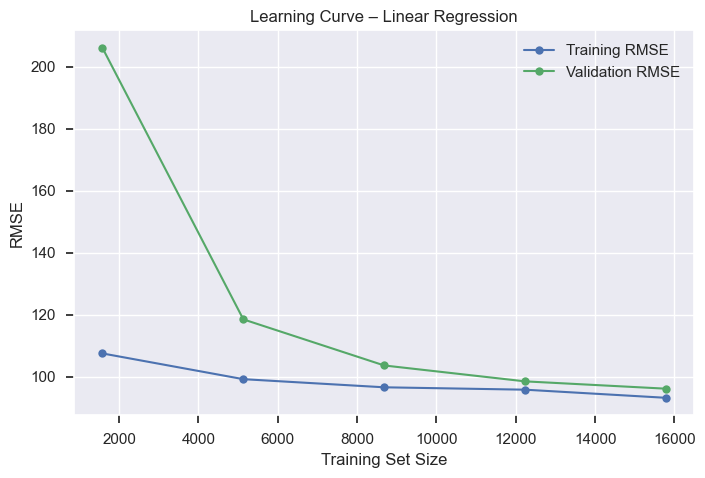

In [58]:
from sklearn.model_selection import learning_curve

X_scaled_full = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(),
    X=X_scaled_full,                 # FULL scaled dataset
    y=y,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

# Convert negative RMSE to positive
train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, marker='o', label='Training RMSE')
plt.plot(train_sizes, test_rmse, marker='o', label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve – Linear Regression')
plt.legend()
plt.show()

### **🧪 Code Cell 27 — learning curve for random forest best estimator**

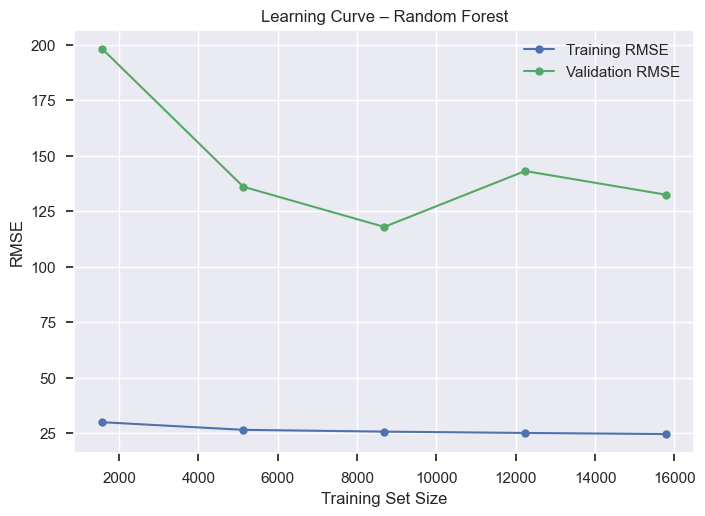

In [59]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_grid.best_estimator_,
    X=X,                # FULL numeric dataset (unscaled)
    y=y,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_rmse, marker='o', label='Training RMSE')
plt.plot(train_sizes, test_rmse, marker='o', label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve – Random Forest')
plt.legend()
plt.show()

### **Conclusion from Learning Curves**

after we analyze these plots we can confirm that the linear regression suffer from high bias (Both the training error and validation error are high, and they are very close to each other) , But in the other hand the Random forest have low training error but high validation error , its not good to because we can see the huge gap between validation and training which indicate that our model need more data to become better , it could be a possible situation for further enhancement to decrease this variance .

### **🧪 Code Cell 28 — Residual Plots**

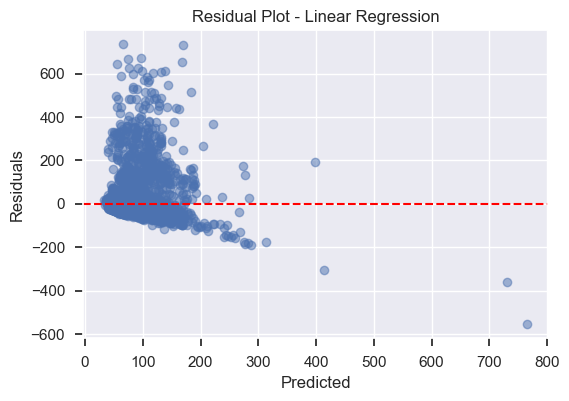

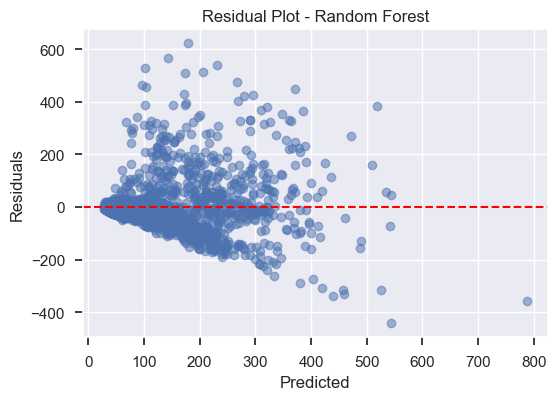

In [60]:
# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot - {model_name}")
    plt.show()

# Example residual plots
plot_residuals(y_test, y_pred_lin, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest")

### **🧪 Code Cell 29 — Feature Importance for Tree-Based Models**

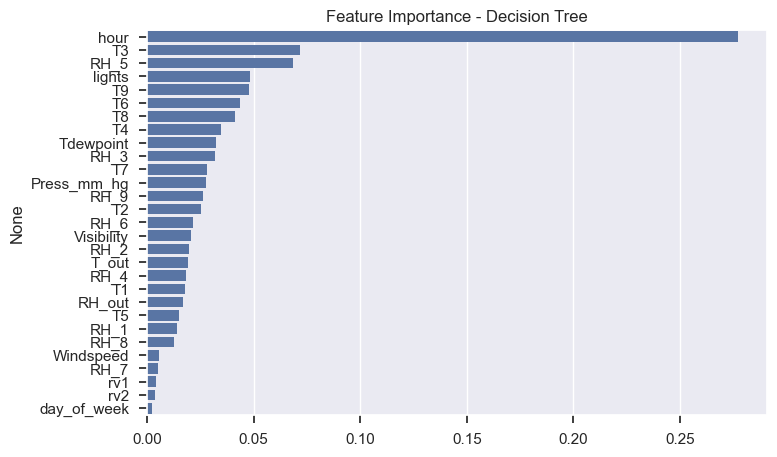

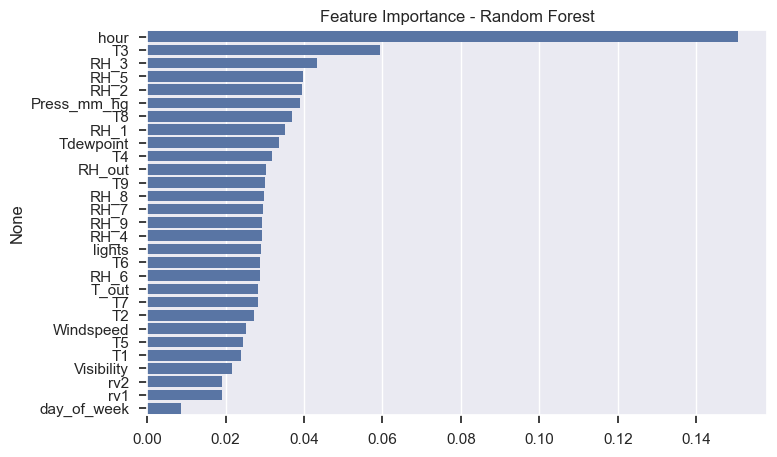

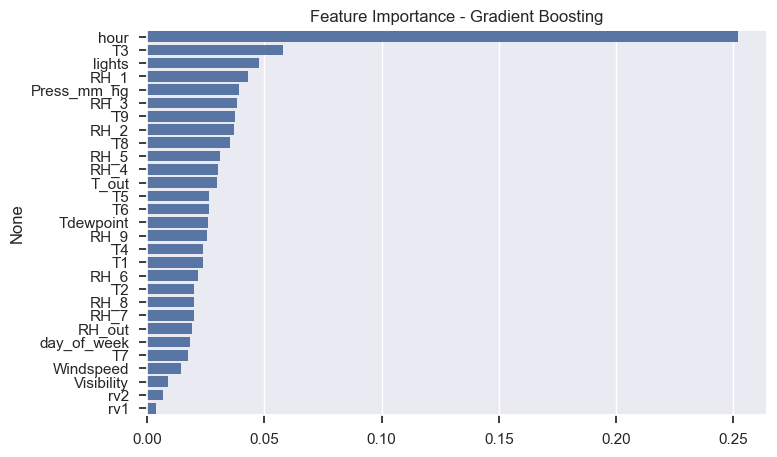

In [61]:
def plot_feature_importance(model, X, model_name):
    if hasattr(model, "feature_importances_"):
        importance = pd.Series(model.feature_importances_, index=X.columns)
        importance = importance.sort_values(ascending=False)
        plt.figure(figsize=(8,5))
        sns.barplot(x=importance.values, y=importance.index)
        plt.title(f"Feature Importance - {model_name}")
        plt.show()

# Decision Tree
plot_feature_importance(dt_model, X_train_numeric, "Decision Tree")

# Random Forest
plot_feature_importance(rf_grid.best_estimator_, X_train_numeric, "Random Forest")

# Gradient Boosting
plot_feature_importance(gb_grid.best_estimator_, X_train_numeric, "Gradient Boosting")

# **Error Analysis & Interpretation**

- Inspect large prediction errors to understand model limitations.
- Visualize residuals to identify patterns (bias at high/low consumption, heteroscedasticity).
- Analyze feature importance in ensemble models and coefficients in linear models.
- Discuss which features are most predictive of appliance energy consumption and if this aligns with domain knowledge.

### **🧪 Code Cell 30 — Inspect Largest Errors**

In [62]:
# Calculate residuals for best model (RF performed best in this example)
residuals_rf = y_test - y_pred_rf

# Combine residuals with predictions and true values
error_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_rf,
    "residual": residuals_rf
})

# Top 10 largest absolute errors
top_errors = error_df.reindex(residuals_rf.abs().sort_values(ascending=False).index).head(10)
top_errors

,y_true,y_pred,residual
13786,800,178.4,621.6
3997,710,142.6,567.4
6444,770,230.9,539.1
16856,630,101.0,529.0
12060,720,205.8,514.2
4577,680,172.7,507.3
5000,740,266.3,473.7
17657,560,96.1,463.9
10090,560,103.5,456.5
13821,820,372.0,448.0


### **🧪 Code Cell 31 — Residuals Distribution**

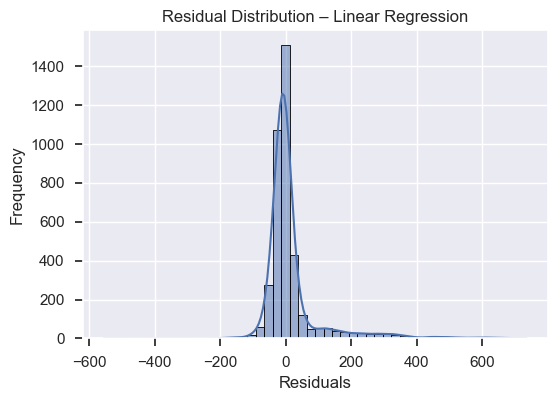

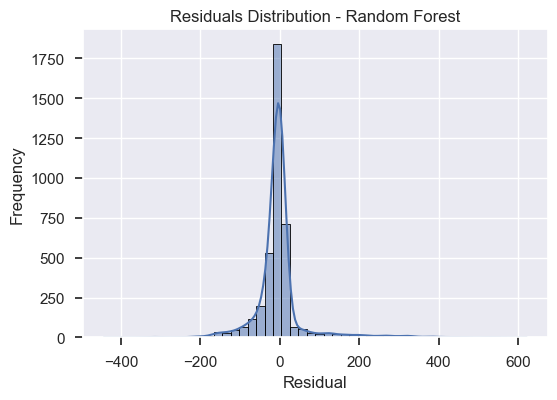

In [63]:
# Residuals for Linear Regression
residuals_lin = y_test - y_pred_lin

plt.figure(figsize=(6, 4))
sns.histplot(residuals_lin, bins=50, kde= True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution – Linear Regression")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals_rf, bins=50, kde=True)
plt.title("Residuals Distribution - Random Forest")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

### **Interpretation of Residuals**

The residual distribution for Linear Regression shows a wide spread and noticeable asymmetry,
indicating that the model is unable to capture the nonlinear structure of the data and produces
systematic errors.

In contrast, the Random Forest residuals are more concentrated around zero and display a more
symmetric distribution, suggesting improved predictive accuracy. The residuals-versus-predicted
plot shows no strong pattern, indicating limited heteroscedasticity and a better overall model
fit.

### **🧪 Code Cell 32 — Linear Model Coefficients**

In [64]:
# Coefficients for Linear Regression
coef_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df

,Feature,Coefficient
2,RH_1,0.409205
19,T_out,-0.391363
11,T6,0.357421
4,RH_2,-0.343362
5,T3,0.327320
3,T2,-0.243603
16,RH_8,-0.194462
17,T9,-0.177329
15,T8,0.169005
0,lights,0.122037


# **Reflection & Conclusions**

## **Key Findings**
- **Ensemble methods** (Random Forest, Gradient Boosting) performed best in terms of MAE, RMSE, and R².
- **Nonlinear models** (Polynomial Regression, SVR) improved over the baseline linear regression but were still outperformed by ensembles.
- Linear regression provided a useful baseline and interpretability through feature coefficients.

## **Trade-offs**
- **Accuracy vs Interpretability**: 
  - Linear models are simple and interpretable but less accurate for complex nonlinear relationships.
  - Ensemble models are highly accurate but less interpretable.
- **Complexity vs Training Time**: 
  - Gradient Boosting and Random Forest require longer training times compared to linear and polynomial regression.

## **Limitations**
- **Dataset size and duration**: Only ~4.5 months of data from a single low-energy house in Belgium; may not generalize.
- **Missing features**: No explicit occupancy data, which could improve prediction accuracy.
- **Temporal dynamics**: Time-series nature of energy consumption was only partially captured via hour/day-of-week features.